In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('bikes_data.csv')
df_1 = data.copy()
df = df_1
df.head()

,Bike names,Bike Prices,City in,Model Year,Kilometers ran
0,Yamaha YZF-R1 2016 for Sale,PKR 50 lacs,Karachi,2016.0,"10,500 km"
1,Chinese Bikes Other 2006 for Sale,PKR 4 lacs,Karachi,2006.0,"20,000 km"
2,OVERDRIVE COUGAR 2019 for Sale,PKR 8.99 lacs,Karachi,2019.0,"12,000 km"
3,Suzuki Hayabusa 2019 for Sale,PKR 95 lacs,Karachi,2019.0,"6,400 km"
4,Suzuki GR 150 2022 for Sale,PKR 4.22 lacs,Karachi,2022.0,"8,000 km"


In [3]:
df["Bike Prices"] = df["Bike Prices"].str.replace('[PKR, lacs]', '', regex=True)
df.head()

,Bike names,Bike Prices,City in,Model Year,Kilometers ran
0,Yamaha YZF-R1 2016 for Sale,50,Karachi,2016.0,"10,500 km"
1,Chinese Bikes Other 2006 for Sale,4,Karachi,2006.0,"20,000 km"
2,OVERDRIVE COUGAR 2019 for Sale,8.99,Karachi,2019.0,"12,000 km"
3,Suzuki Hayabusa 2019 for Sale,95,Karachi,2019.0,"6,400 km"
4,Suzuki GR 150 2022 for Sale,4.22,Karachi,2022.0,"8,000 km"


In [4]:
df['Bike Prices'] = df['Bike Prices'].astype(float)
df['Bike Prices'].dtype

dtype('float64')

In [5]:
df['Kilometers ran'] = df['Kilometers ran'].replace('\D', '', regex=True).astype(float)
df["Kilometers ran"]

0      10500.0
1      20000.0
2      12000.0
3       6400.0
4       8000.0
        ...   
459    38523.0
460    68000.0
461    60000.0
462     3100.0
463     2000.0
Name: Kilometers ran, Length: 464, dtype: float64

In [10]:
df.head()

,Bike names,Bike Prices,City in,Model Year,Kilometers ran
0,Yamaha YZF-R1 2016 for Sale,50.00,Karachi,2016.0,10500.0
1,Chinese Bikes Other 2006 for Sale,4.00,Karachi,2006.0,20000.0
2,OVERDRIVE COUGAR 2019 for Sale,8.99,Karachi,2019.0,12000.0
3,Suzuki Hayabusa 2019 for Sale,95.00,Karachi,2019.0,6400.0
4,Suzuki GR 150 2022 for Sale,4.22,Karachi,2022.0,8000.0


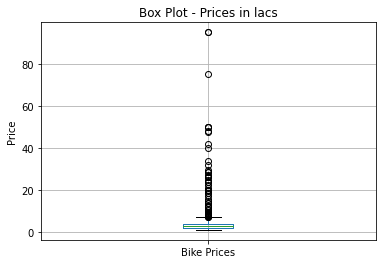

In [7]:
# df['Bike Prices'].plot()
df.boxplot(column='Bike Prices')

# Set chart title and axis labels
plt.title('Box Plot - Prices in lacs')
plt.ylabel('Price')

# Display the chart
plt.show()

C:\Users\Ayaz Lakho\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


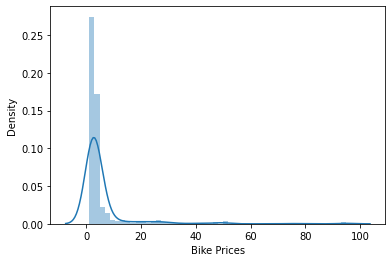

In [26]:
sns.distplot(df['Bike Prices']);
# sns.histplot(data = df, y=df['Bike Prices']);

In [36]:

# columns_to_drop = ['Bike names', 'Bike Prices', 'City in']
# x = df.drop(columns_to_drop, axis=1)
x = df[['Bike Prices', 'Model Year', 'Kilometers ran']]
x.dropna()
x.head()

,Bike Prices,Model Year,Kilometers ran
0,50.00,2016.0,10500.0
1,4.00,2006.0,20000.0
2,8.99,2019.0,12000.0
3,95.00,2019.0,6400.0
4,4.22,2022.0,8000.0


In [37]:
y = df['Bike Prices']
y.dropna()
y.head()

0    50.00
1     4.00
2     8.99
3    95.00
4     4.22
Name: Bike Prices, dtype: float64

In [46]:
df = df.reset_index()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [49]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [50]:
regr.intercept_

-3.4372504842394846e-13

In [51]:
regr.coef_

array([ 1.00000000e+00, -9.97344596e-17,  3.02059719e-17])

In [73]:
x_test.dropna(inplace=True)
y_test.dropna(inplace=True)
print(x_test.shape)
print(y_test.shape)


(153, 3)
(154,)


In [65]:
predictions = regr.predict(x_test)
predictions[10]

2.450000000000723

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [154, 153]